<a href="https://colab.research.google.com/github/AlvaroUriel/idal_ia3/blob/main/tfm_v4_0_230423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:

from  google.colab import drive
 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [45]:

#Imports
import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET

# Keras
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import imagenet_utils
from tensorflow.keras.utils import load_img, img_to_array
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory


import matplotlib.pyplot as plt; 
import matplotlib.image as Img
import matplotlib.patches as patches
from numpy.core.fromnumeric import argmax


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [46]:

test_img_path = '/content/drive/MyDrive/IA3/TFM/archive/images/BikesHelmets345.png'
test_dat_path = '/content/drive/MyDrive/IA3/TFM/archive/annotations/BikesHelmets345.xml'

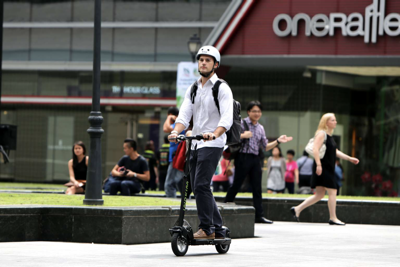

In [47]:

#Visualizamos la primera imagen del dataset
cv2_imshow(cv2.imread(test_img_path))

In [48]:

#Visualizamos el xml con los bounding boxes la primera imagen del dataset
xml_file = open(test_dat_path)
print(xml_file.read())


<annotation>
    <folder>images</folder>
    <filename>BikesHelmets345.png</filename>
    <size>
        <width>400</width>
        <height>267</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>192</xmin>
            <ymin>39</ymin>
            <xmax>226</xmax>
            <ymax>83</ymax>
        </bndbox>
    </object>
</annotation>


192
39
226
83
44
34
400
267


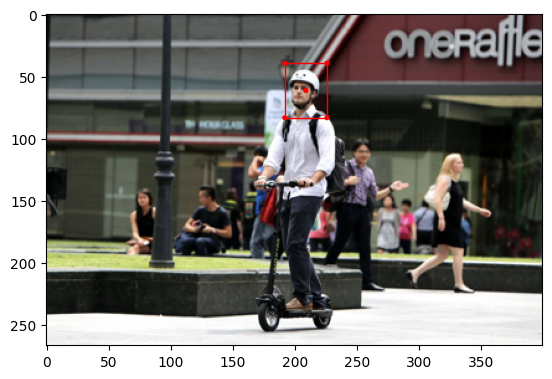

In [62]:

#Pintamos sobre la imagen los bounding boxes
fig, ax = plt.subplots()

image = load_img(test_img_path)
ax.imshow(image)

tree=ET.parse(test_dat_path)

for element in tree.findall('object'):

    imgW = int (tree.find('size').find('width').text)
    imgH = int (tree.find('size').find('height').text)

    xmin = int(element.find("bndbox").find('xmin').text)
    ymin = int(element.find("bndbox").find('ymin').text)
    xmax = int(element.find("bndbox").find('xmax').text)
    ymax = int(element.find("bndbox").find('ymax').text)

    h = ymax - ymin
    w = xmax - xmin

    rect = patches.Rectangle((int(xmin), int(ymin)), int(w), int(h), linewidth=1, edgecolor='r', facecolor='none')
    circ = patches.Circle((xmin+(w/2.0), ymin+(h/2.0)), 1.5, edgecolor='r', facecolor='r')
    circ1 = patches.Circle((xmin, ymin), 1.5, edgecolor='r', facecolor='r')
    circ2 = patches.Circle((xmin+(w/1.0), ymin), 1.5, edgecolor='r', facecolor='r')
    circ3 = patches.Circle((xmin, ymin+(h/1.0)), 1.5, edgecolor='r', facecolor='r')
    circ4 = patches.Circle((xmin+(w/1.0), ymin+(h/1.0)), 1.5, edgecolor='r', facecolor='r')

    ax.add_patch(rect)
    ax.add_patch(circ)
    ax.add_patch(circ1)
    ax.add_patch(circ2)
    ax.add_patch(circ3)
    ax.add_patch(circ4)        

    print(xmin)
    print(ymin)
    print(xmax)
    print(ymax)

    print(h)
    print(w)

    print(imgW)
    print(imgH)


plt.show()

In [54]:


# Convert Pascal_Voc bb to Yolo
def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    return [((x2 + x1)/(2*image_w)), ((y2 + y1)/(2*image_h)), (x2 - x1)/image_w, (y2 - y1)/image_h]

In [55]:
pascal_voc_to_yolo(xmin, ymin, xmax, ymax, imgW, imgH)

[0.5225, 0.22846441947565543, 0.085, 0.1647940074906367]